In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\97150\\OneDrive\\Desktop\\personal\\UDEMY\\Tensor Flow\\TF_2_Notebooks_and_Data\\DATA\\UK_foods.csv',index_col='Unnamed: 0')

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [ ]:
# The Data
In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.
The table shows some interesting variations across different food types, but overall differences aren't so notable.

In [5]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<AxesSubplot:>

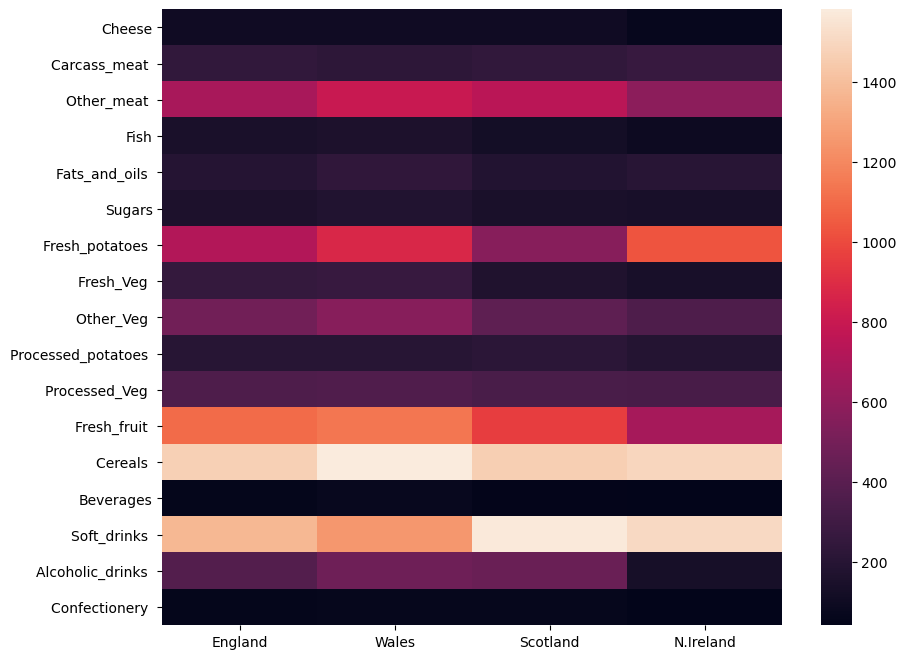

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [15]:
encoder=Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [16]:
decoder=Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [17]:
autoencoder=Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [18]:
df2=df.transpose()

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
scaled_data=scaler.fit_transform(df2)

In [26]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [27]:
autoencoder.fit(scaled_data,scaled_data,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 2/15
1/1 [==============================] - 0s 998us/step - loss: 0.3365
Epoch 3/15
1/1 [==============================] - 0s 997us/step - loss: 0.3364
Epoch 4/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3408
Epoch 5/15
1/1 [==============================] - 0s 998us/step - loss: 0.3415
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.3646
Epoch 7/15
1/1 [==============================] - 0s 997us/step - loss: 0.3330
Epoch 8/15
1/1 [==============================] - 0s 998us/step - loss: 0.3322
Epoch 9/15
1/1 [==============================] - 0s 981us/step - loss: 0.3329
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 11/15
1/1 [==============================] - 0s 996us/step - loss: 0.3394
Epoch 12/15
1/1 [==============================] - 0s 997us/step - loss: 0.3652
Epoch 13/15
1/1 [==============================] - 0s 2ms

In [28]:
encoded_data=encoder.predict(scaled_data)

In [29]:
encoded_data

array([[0.94304  , 0.       ],
       [1.4997385, 0.       ],
       [1.0794232, 0.       ],
       [0.0931602, 0.       ]], dtype=float32)

In [30]:
encoded_data.shape

(4, 2)

In [31]:
scaled_data.shape

(4, 17)

In [32]:
df2

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [33]:
results = pd.DataFrame(data=encoded_data,index=df2.index,
                      columns=['C1','C2'])

In [34]:
results

,C1,C2
England,0.943040,0.0
Wales,1.499738,0.0
Scotland,1.079423,0.0
N.Ireland,0.093160,0.0


In [35]:
results = results.reset_index()

In [36]:
results

,index,C1,C2
0,England,0.943040,0.0
1,Wales,1.499738,0.0
2,Scotland,1.079423,0.0
3,N.Ireland,0.093160,0.0


<AxesSubplot:xlabel='C1', ylabel='C2'>

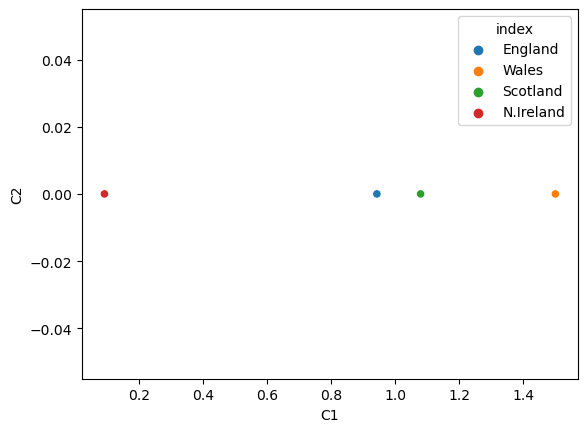

In [38]:
sns.scatterplot(x='C1',y='C2',hue='index',data=results)

In [ ]:
#  Once we go back and look at the data in the table, 
this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. 
It's a good sign that structure we've visualized reflects a big fact of real-world geography since Northern Ireland is the only of the four countries not on the island of Great Britain